In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import glob
import ir_measures
from ir_measures import * # imports all supported measures, e.g., AP, nDCG, RR, P

In [ ]:
csv = f'/nfs/primary/retrievability-bias/results/expt1/result_all_models_all_groups_avg_rscore_new_gini.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
df[df['min_localiszed_gini'] == 0]

In [168]:
df2 = df[(df['modelname'] == 'bm25') & (df['grps'] == 2000)]
df2

,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
8,bm25,0,2000,0.1843,0.2852,0.7536,0.0837,0.0,0.3378,NaN,NaN
9,bm25,30,2000,0.1843,0.2913,0.7061,0.0884,0.0,0.3226,NaN,NaN
10,bm25,60,2000,0.1843,0.3106,0.7366,0.1019,0.0,0.3302,NaN,NaN
11,bm25,90,2000,0.1843,0.3674,0.7548,0.1297,0.0,0.3477,NaN,NaN


In [169]:
df3 = df[(df['modelname'] == 'splade') & (df['grps'] == 2000)]
df3

,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
48,splade,0,2000,0.1843,0.2863,0.5680,0.0888,0.0,0.2480,NaN,NaN
49,splade,30,2000,0.1843,0.2973,0.6034,0.0990,0.0,0.2537,NaN,NaN
50,splade,60,2000,0.1843,0.3226,0.6818,0.1244,0.0,0.2695,NaN,NaN
51,splade,90,2000,0.1851,0.4018,0.7688,0.1896,0.0,0.3265,NaN,NaN


In [170]:
df4 = df[(df['modelname'] == 'tctcolbert') & (df['grps'] == 2000)]
df4

,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
68,tctcolbert,0,2000,0.1843,0.2860,0.5798,0.0823,0.0,0.2247,NaN,NaN
69,tctcolbert,30,2000,0.1843,0.2977,0.6276,0.0920,0.0,0.2293,NaN,NaN
70,tctcolbert,60,2000,0.1843,0.3233,0.6979,0.1144,0.0,0.2426,NaN,NaN
71,tctcolbert,90,2000,0.1859,0.4016,0.7386,0.1736,0.0,0.3038,NaN,NaN


In [171]:
df5 = df[(df['modelname'] == 'bm25_tctcolbert') & (df['grps'] == 2000)]
df5

,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
88,bm25_tctcolbert,0,2000,0.1843,0.2805,0.7245,0.0837,0.0,0.2620,NaN,NaN
89,bm25_tctcolbert,30,2000,0.1843,0.2887,0.6727,0.0884,0.0,0.2568,NaN,NaN
90,bm25_tctcolbert,60,2000,0.1843,0.3088,0.7086,0.1019,0.0,0.2703,NaN,NaN
91,bm25_tctcolbert,90,2000,0.1843,0.3678,0.7509,0.1297,0.0,0.3100,NaN,NaN


In [122]:
df5 = df[(df['modelname'] == 'bm25_monot5') & (df['grps'] == 2000)]
df5

,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
88,bm25_tctcolbert,0,2000,0.1687,0.2670,0.7009,0.0816,-0.9,0.2446,NaN,NaN
89,bm25_tctcolbert,30,2000,0.1685,0.2751,0.6425,0.0864,-0.9,0.2377,NaN,NaN
90,bm25_tctcolbert,60,2000,0.1685,0.2949,0.6803,0.0995,-0.9,0.2514,NaN,NaN
91,bm25_tctcolbert,90,2000,0.1715,0.3521,0.7151,0.1267,-0.9,0.3029,NaN,NaN


In [ ]:
# bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 0)]
# bm25.head()

In [92]:
def Gini(v):
    v = np.array(v)
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = [0]
    for b in bins[1:]:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return gini_val

In [126]:
# def gini1(x):
#     # Ensure the array is sorted
#     sorted_x = np.sort(x)
#     n = len(x)
#     # Calculate the Lorenz curve cumulative values
#     cumulative_x = np.cumsum(sorted_x)
#     # Calculate the Gini coefficient using the Lorenz curve
#     gini = (n + 1 - 2 * np.sum(cumulative_x) / cumulative_x[-1]) / n
#     return gini

In [136]:
def gini2(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [155]:
gini2([0,0,100])

0.6666666666666666

In [144]:
csv = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok/bm25/groups/new_clustered/result_bm25_dev_topics_grps_2000_T0_avg_rscore2.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
gini2(df['min_r_score'].to_list())
# df6['min_r_score'].min()
# df6['min_r_score'].to_list()

0.0

In [145]:
csv = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok/splade/groups/new_clustered/result_splade_dev_topics_grps_2000_T0_avg_rscore2.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
gini2(df['min_r_score'].to_list())
# df6['min_r_score'].min()
# df6['min_r_score'].to_list()

0.0

In [146]:
csv = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok/tctcolbert/groups/new_clustered/result_tctcolbert_dev_topics_grps_2000_T0_avg_rscore2.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
gini2(df['min_r_score'].to_list())
# df6['min_r_score'].min()
# df6['min_r_score'].to_list()

0.0

In [147]:
csv = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok/bm25_tctcolbert/groups/new_clustered/result_bm25_tctcolbert_dev_topics_grps_2000_T0_avg_rscore2.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
gini2(df['min_r_score'].to_list())
# df6['min_r_score'].min()
# df6['min_r_score'].to_list()

0.0

In [148]:
csv = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok/bm25_monot5/groups/new_clustered/result_bm25_monot5_dev_topics_grps_2000_T0_avg_rscore2.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
gini2(df['min_r_score'].to_list())
# df6['min_r_score'].min()
# df6['min_r_score'].to_list()

0.0

In [133]:
gini1(df6['max_r_score'].to_list())

0.33777986875187743

In [134]:
gini2([1,1,1])

0.0

In [135]:
gini2(df6['max_r_score'].to_list())

0.33777986875187743

In [ ]:
gini2(df6['max_r_score'].to_list())

In [118]:
gini_coefficient([1,1,1])

0.0

In [62]:
# df2.shape

(2649, 2)

In [65]:
# csv = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok/bm25/groups2/new_clustered/result_bm25_dev_topics_grps_2000_1999_T0_avg_rscore.csv'
# df3 = pd.read_csv(csv, index_col=0).reset_index()
# df3.head(10)
# df3[df3['avg_r_score'] > 50].shape

,modelname,threshold,grps,group_id,mean,std,gini,avg_r_score,nDCG@10,RR
0,bm25,0,2000,0,34.634257,27.429760,0.244301,34.634257,NaN,NaN
1,bm25,0,2000,1,33.080935,19.942351,0.217876,33.080935,NaN,NaN
2,bm25,0,2000,2,36.118400,26.487319,0.271758,36.118400,NaN,NaN
3,bm25,0,2000,3,30.999596,16.928367,0.187579,30.999596,NaN,NaN
4,bm25,0,2000,4,33.763181,22.299835,0.236757,33.763181,NaN,NaN
5,bm25,0,2000,5,35.779495,21.394152,0.250339,35.779495,NaN,NaN
6,bm25,0,2000,6,33.547237,22.517492,0.228117,33.547237,NaN,NaN
7,bm25,0,2000,7,38.404117,29.930359,0.292578,38.404117,NaN,NaN
8,bm25,0,2000,8,35.575583,31.679088,0.261867,35.575583,NaN,NaN
9,bm25,0,2000,9,34.614854,27.437849,0.246656,34.614854,NaN,NaN


In [64]:
df3.shape

(2000, 10)

In [176]:
csv = f'/nfs/primary/retrievability-bias/results/expt1/result_all_models_all_groups_avg_rscore_new_gini.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
# df[df['min_localiszed_gini'] == 0]

In [177]:
def sub_plot(plt,threshold,title,col, ylabel):
    bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == threshold)]
    bm25_monot5 = df[(df['modelname'] == 'bm25_monot5') & (df['threshold'] == threshold)]
    splade = df[(df['modelname'] == 'splade') & (df['threshold'] == threshold)]
    tctcolbert = df[(df['modelname'] == 'tctcolbert') & (df['threshold'] == threshold)]
    bm25_tctcolbert = df[(df['modelname'] == 'bm25_tctcolbert') & (df['threshold'] == threshold)]

    x = [1,2,3,4,5]
    # col = 'min_gini'
    y = bm25[col]
    line1, = plt.plot(x,y,label='BM25', marker='.')
    y = bm25_monot5[col]
    line2, = plt.plot(x,y,label='BM25_monot5', marker='.')
    y = splade[col]
    line3, = plt.plot(x,y,label='Splade', marker='.')
    y = tctcolbert[col]
    line4, = plt.plot(x,y,label='TCTColbert', marker='.')
    y = bm25_tctcolbert[col]
    line5, = plt.plot(x,y,label='BM25_TCTColbert', marker='.')


    # plt.set_title('Exposure Fairness')
    plt.set_title(title)
    plt.set_xlabel(r'#Groups ($K$)')
    
    if threshold ==0:
        # ylabel = 'Min Gini Coefficient'
        plt.set_ylabel(ylabel)
    plt.set_xticks(ticks = x, labels = ['500', '1000', '2000', '5000', '10000'])
    # plt.set_yticks(ticks = y, labels = [f'{i:.2f}' for i in y])
    return line1, line2,line3,line4,line5

    # plt.legend(loc='lower left', fontsize=11)


KeyError: 'localiszed_gini'

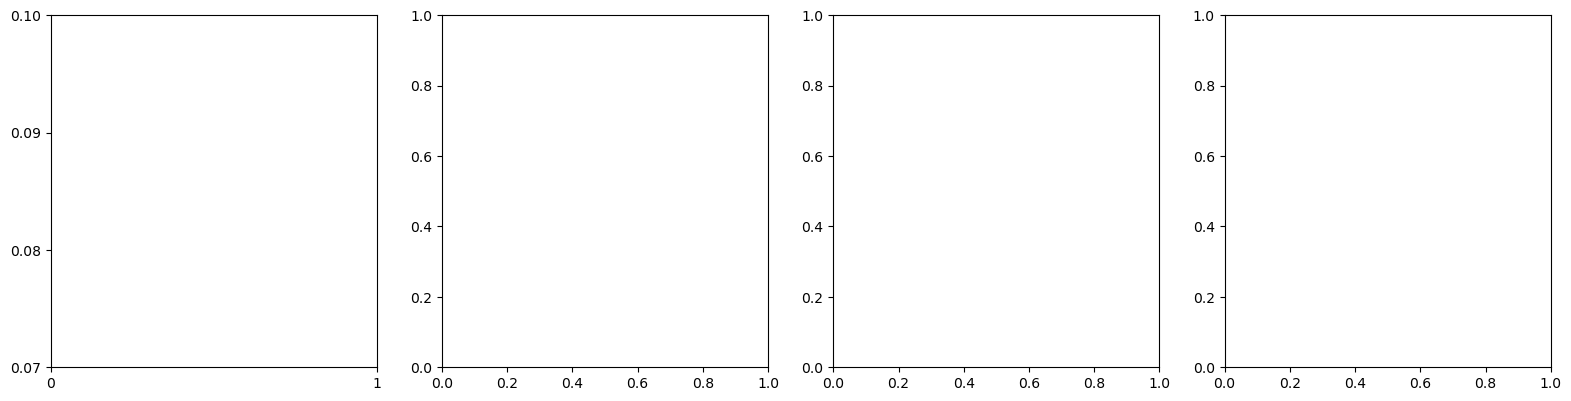

In [178]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

col = 'localiszed_gini'
ylabel = 'Gini Coefficient'

ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.01))
# ax0.set_xlim(1,5)
ax0.set_ylim(0.07,0.10)
g0 = sub_plot(ax0,0,'Entire MS MARCO',col, ylabel)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.01))
# ax1.set_xlim(1,5)
ax1.set_ylim(0.07,0.11)
g1 = sub_plot(ax1,30,'30% pruned MS MARCO',col, ylabel)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.01))
# ax2.set_xlim(1,5)
ax2.set_ylim(0.08,0.13)
g2 = sub_plot(ax2,60, '60% pruned MS MARCO',col, ylabel)

ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.yaxis.set_major_locator(MultipleLocator(0.01))
# ax3.set_xlim(1,5)
ax3.set_ylim(0.10,0.19)
g3 = sub_plot(ax3,90,'90% pruned MS MARCO',col, ylabel)

# g = list(g0 + g1 + g2 + g3)

fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=10)
filename = f'avg_r_gini.pdf'
plt.savefig(f'./results/new_clustered/{filename}', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

In [157]:
data_dir = f'/nfs/datasets/cxj/retrievability-bias-from_resources_ok'
# root_dir = '/root/retrievability-bias'
prg_dir = '/nfs/primary/retrievability-bias/results/expt1'
# os.makedirs(f'{root_dir}/allresults', exist_ok=True)
os.makedirs(f'{data_dir}/allresults', exist_ok=True)
os.makedirs(prg_dir, exist_ok=True)


# for modelname in ['bm25', 'bm25_monot5', 'rtr_splade', 'tctcolbert','bm25_tctcolbert']:
# for modelname in ['bm25', 'bm25_monot5', 'splade', 'tctcolbert','bm25_tctcolbert']:
for modelname in ['bm25']:
    # os.makedirs(f'{root_dir}/{modelname}/groups/new_clustered/', exist_ok=True)
    os.makedirs(f'{data_dir}/{modelname}/groups/new_clustered/', exist_ok=True)
    this_model_res = []
    eval_topics = 'dev_all'
    grps = 1
    for threshold in [0]:
        """
        Calc retrievability score for each doc
        """
        print(f'start  {modelname} --> {eval_topics} --number of groups {grps} --> threshold {threshold}')
        # origin_topics = eval_topics.split('_')[0]
        origin_topics = 'dev'
        rscore_csv = f'{data_dir}/{modelname}/df_{modelname}_{origin_topics}_rscore_{threshold}.csv'
        if os.path.exists(rscore_csv):
            print(f'loading {rscore_csv}')
            df = pd.read_csv(rscore_csv, index_col=0).reset_index()


start  bm25 --> dev_all --number of groups 1 --> threshold 0
loading /nfs/datasets/cxj/retrievability-bias-from_resources_ok/bm25/df_bm25_dev_rscore_0.csv


In [161]:
df[df['r_score'] > 0].head()

,qid,docid,docno,rank,score,query,text,r_score
0,1048578,7187236,7187236,0,67.528593,cost of endless pools swim spa,The Endless Pool 15' endless pools swim spa Endless Pool Nightmare Buy A Big Spa Instead Great t...,144.269504
1,1048578,7471198,7471198,1,62.121928,cost of endless pools swim spa,Cal Spas is the leading maker of home resort products. Cal Spas makes a great jetted swim spa wi...,91.023923
2,1048578,5365326,5365326,2,51.958492,cost of endless pools swim spa,"How much does a swim spa cost. 1 A top of the line, branded swim spa 9 feet by 16 feet with the...",72.134752
3,1048578,7187241,7187241,3,51.947947,cost of endless pools swim spa,Disclaimer: Endless Pools (and all other swim spa manufacturers) are intentionally secretive abo...,62.133493
4,1048578,6802210,6802210,4,47.925985,cost of endless pools swim spa,"Endless Pools is one of the first companies to develop this Swim Spa, or “endless” swimming pool...",55.811063


In [164]:
print(100 / np.log(50 + 2))

25.308486927731686


In [165]:
csv = f'/nfs/primary/retrievability-bias/results/expt1/result_all_models_all_groups_avg_rscore_full_collection.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [166]:
df.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
0,bm25,0,1,0.4731,0.4731,0.4731,0.0,0.0,0.0,0.2131,0.1814
1,bm25_monot5,0,1,0.4429,0.4429,0.4429,0.0,0.0,0.0,0.3950,0.3516
2,splade,0,1,0.3948,0.3948,0.3948,0.0,0.0,0.0,0.4460,0.3917
3,tctcolbert,0,1,0.3994,0.3994,0.3994,0.0,0.0,0.0,0.4210,0.3701
4,bm25_tctcolbert,0,1,0.4473,0.4473,0.4473,0.0,0.0,0.0,0.3713,0.3281
